# Validation: Mobility data sensitivity

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of mobility data on cm effectiveness

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import arviz as az
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl


%matplotlib inline

In [63]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_mob_no_work.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


## build and run model
skip this if you already have traces 

In [10]:
model_types = ['combined', 'active', 'death']

In [119]:
for model_type in model_types:
    print('Model: ' + str(model_type))
    if model_type=='combined':
        with cm_effect.models.CMCombined_Final(data) as model:
            model.build_model()  
    if model_type=='active':
        with cm_effect.models.CMActive_Final(data) as model:
            model.build_model()  
    if model_type=='death':
        with cm_effect.models.CMDeath_Final(data) as model:
            model.build_model()                      

    model.run(1000, chains=8, cores=8)
    filename = 'out_final/data_mobility_' + model_type + '.txt'
    cm_trace = model.trace["CMReduction"]
    np.savetxt(filename, cm_trace)

Serial interval mean: 5
Model: active
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (2

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha               6.90
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
Growth              3810.02
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -59837.85
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [33:44<00:00,  2.47draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


Serial interval mean: 6
Model: active
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (2

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha               6.90
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
Growth              3810.02
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -45860.01
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [59:35<00:00,  1.40draws/s]  
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


Serial interval mean: 7
Model: active
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (2

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha               6.90
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
Growth              3810.02
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -36086.01
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [49:47<00:00,  1.67draws/s]  
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


Serial interval mean: 8
Model: active
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (2

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha               6.90
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
Growth              3810.02
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -29080.23
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [34:21<00:00,  2.43draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


### Plot traces 

In [ ]:
plt.figure()
model.plot_traces()

### Plot countermeasure effectiveness

In [64]:
cm_labels = data.CMs
legend_labels = ['Default', 'Mobility Data Added']
y_offset = 0.1
legend_fontsize=6
bbox_to_anchor = (1.035, 0.95)

##### plot combined

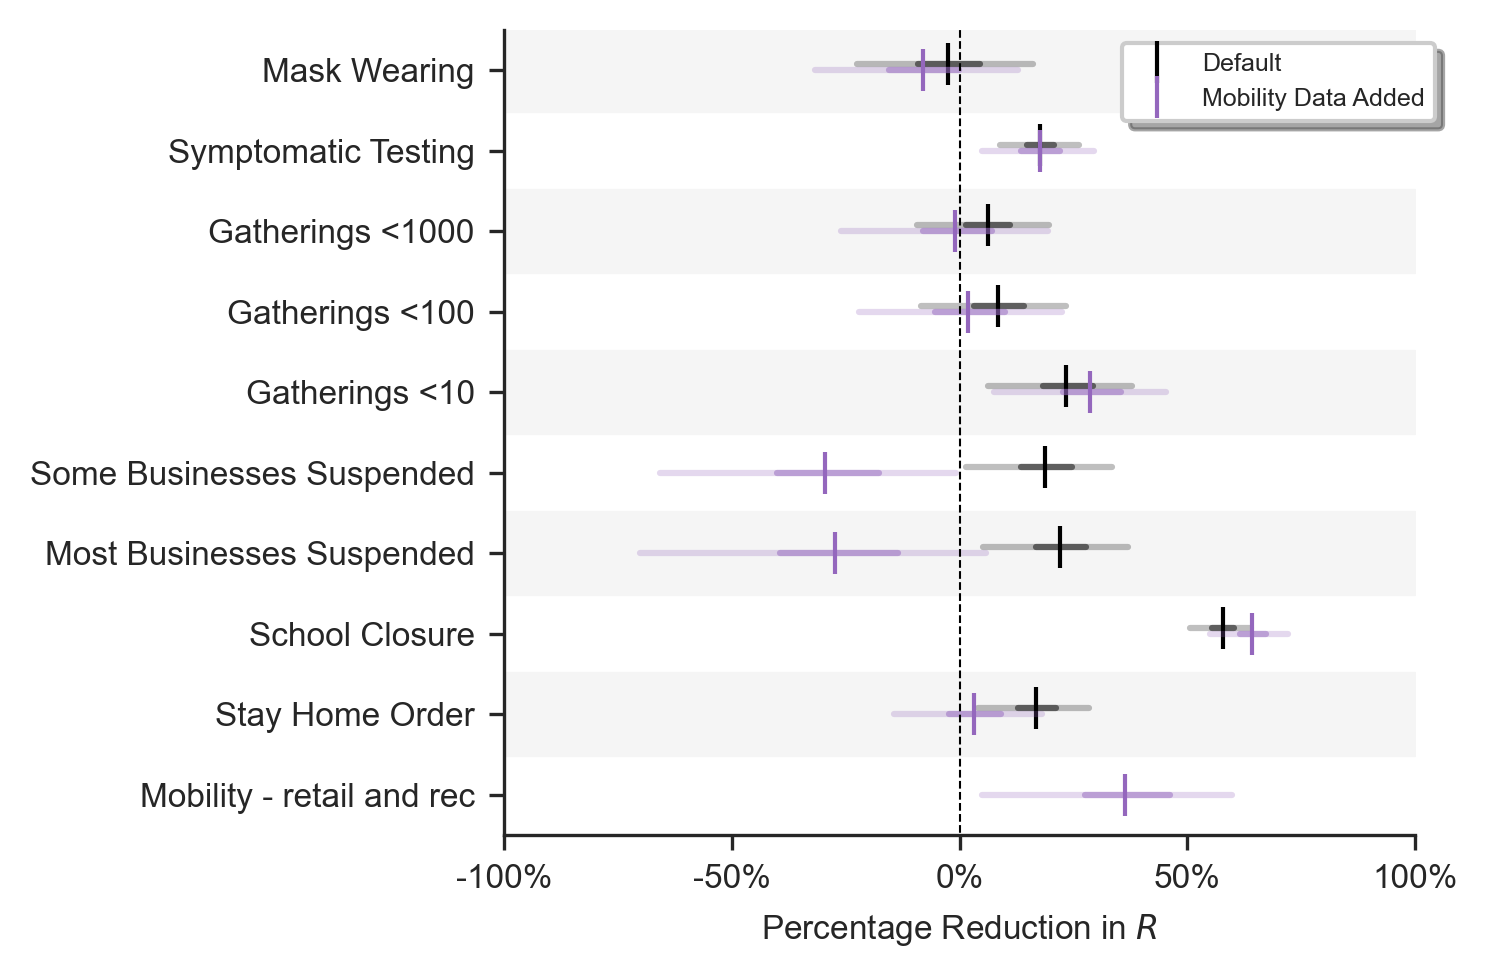

In [73]:
colors= ['black','tab:purple']
filenames = ['out_final/default_combined.txt', 'out_final/data_mobility_combined.txt']
spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels, 
                               colors=colors, 
                               y_offset=y_offset, 
                               legend_fontsize=legend_fontsize,
                               bbox_to_anchor=(1.035, 1))
plt.savefig('out_final/data_mobility_sensitivity_combined.pdf')

##### plot active

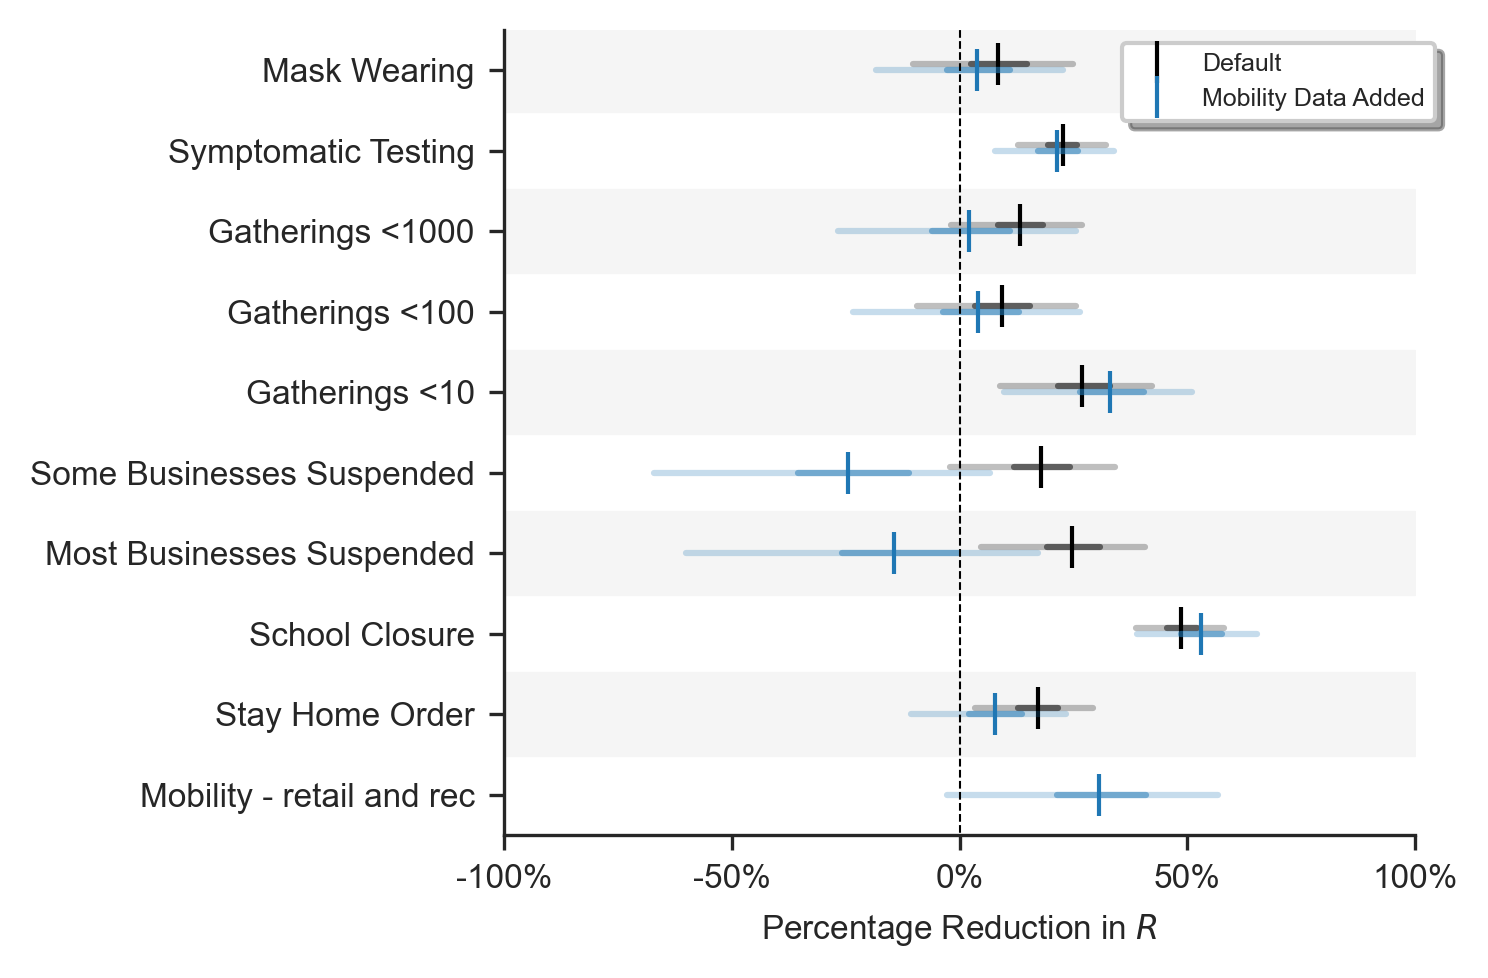

In [74]:
colors= ['black','tab:blue']
filenames = ['out_final/default_active.txt', 'out_final/data_mobility_active.txt']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels, 
                               colors=colors, 
                               y_offset=y_offset, 
                               legend_fontsize=legend_fontsize,
                               bbox_to_anchor=(1.035, 1))
plt.savefig('out_final/data_mobility_sensitivity_active.pdf')

##### plot deaths

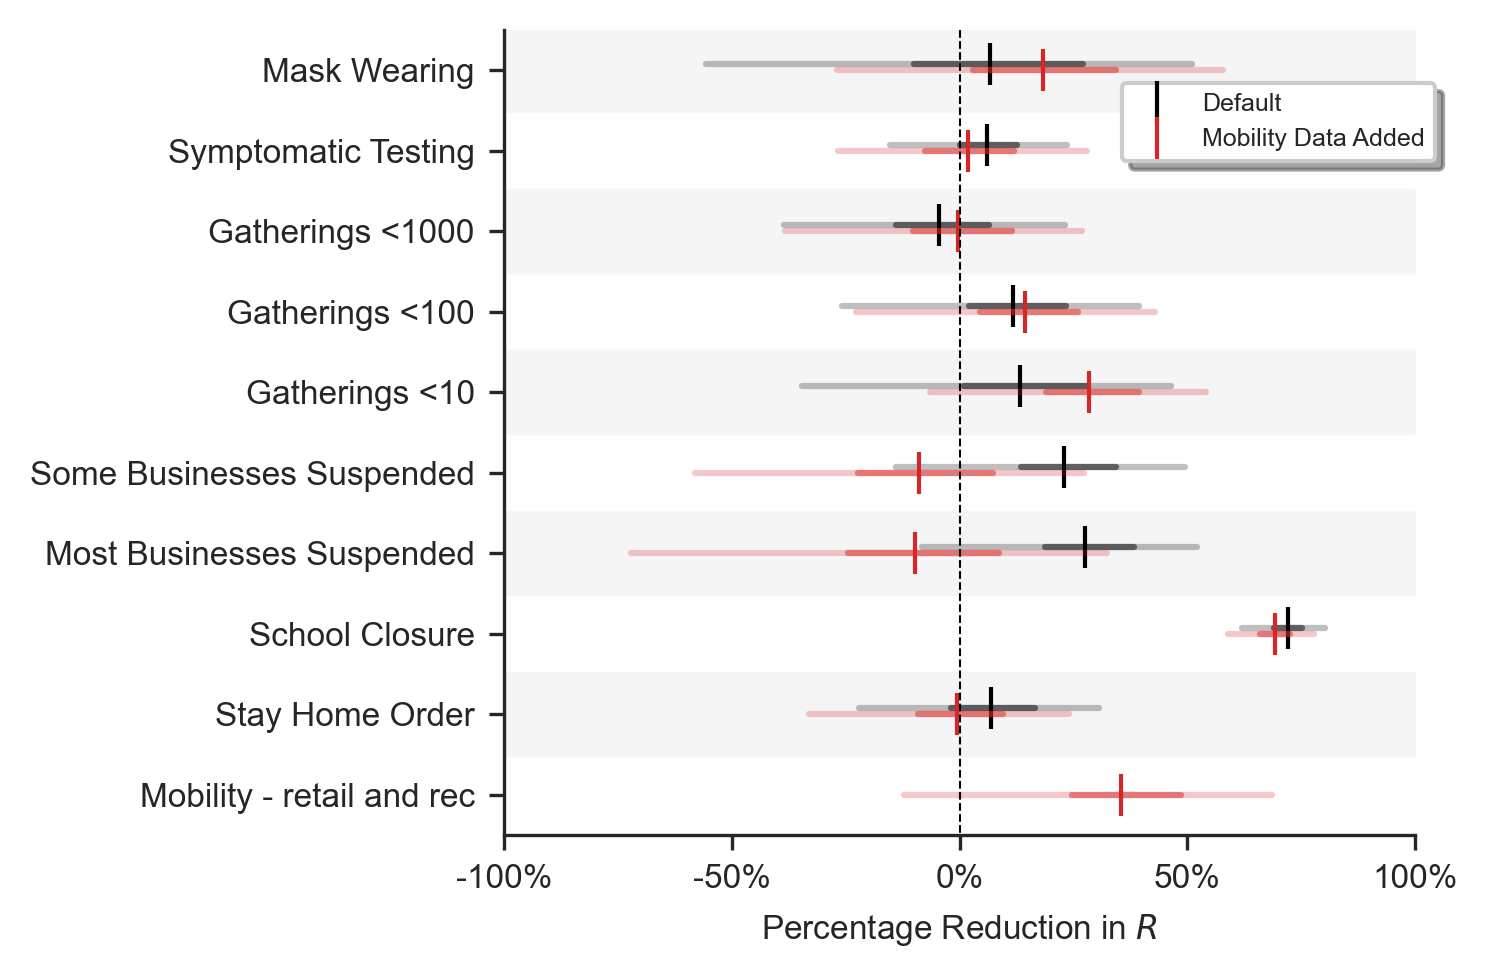

In [72]:
colors= ['black','tab:red']
filenames = ['out_final/default_death.txt', 'out_final/data_mobility_death.txt']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels, 
                               colors=colors, 
                               y_offset=y_offset, 
                               legend_fontsize=legend_fontsize,
                               bbox_to_anchor=bbox_to_anchor)
plt.savefig('out_final/data_mobility_sensitivity_death.pdf')